In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic=sns.load_dataset('titanic')
print(type(titanic))
titanic.head()

<class 'pandas.core.frame.DataFrame'>


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# survived    int (0,1)  생존 여부 (0 = 사망, 1 = 생존)
# pclass      int        객실 등급 (1 = 1등석, 2 = 2등석, 3 = 3등석)
# sex         category   성별 ("male", "female")
# age         float      나이 (일부 결측값 있음)
# sibsp       int        같이 탑승한 형제/자매(siblings) + 배우자(spouses) 수
# parch       int        같이 탑승한 부모(parents) + 자녀(children) 수
# fare        float      요금 (탑승권 가격)
# embarked    category   탑승 항구 ("C" = Cherbourg, "Q" = Queenstown, "S" = Southampton)
# class       category   객실 등급 (문자열 버전: "First", "Second", "Third")
# who         category   성별/연령 구분 ("man", "woman", "child")
# adult_male  bool       성인 남성 여부
# deck        category   선실 갑판 위치 (A–G, 일부 NaN)
# embark_town category   탑승 도시 ("Cherbourg", "Queenstown", "Southampton")
# alive       category   생존 여부 문자열 ("yes", "no")
# alone       bool       혼자 탔는지 여부 (True = 혼자, False = 가족 동반)

In [4]:
# 전체 컬럼 정보
# titanic.info()

# 컬럼별 결측치 개수 확인
titanic.isnull().sum()
# titanic.isna().sum() # 같은 역할

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
# 결측치 대체
# 중앙값으로 대체

titanic['age']=titanic['age'].fillna(titanic['age'].median())


In [6]:
# 결측치 대체
# 최빈값으로 대체
print(titanic['embarked'].value_counts())
print(titanic['embark_town'].value_counts())
print(titanic['deck'].value_counts())

titanic['embarked']=titanic['embarked'].fillna('S')
titanic['embark_town']=titanic['embark_town'].fillna('Southampton')
titanic['deck']=titanic['deck'].fillna('C')

embarked
S    644
C    168
Q     77
Name: count, dtype: int64
embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64
deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64


In [7]:
# 결측치 여부 재확인
titanic.isnull().sum()

# 데이터 타입과 갯수, null 확인
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
#  생존자 수 확인
titanic['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

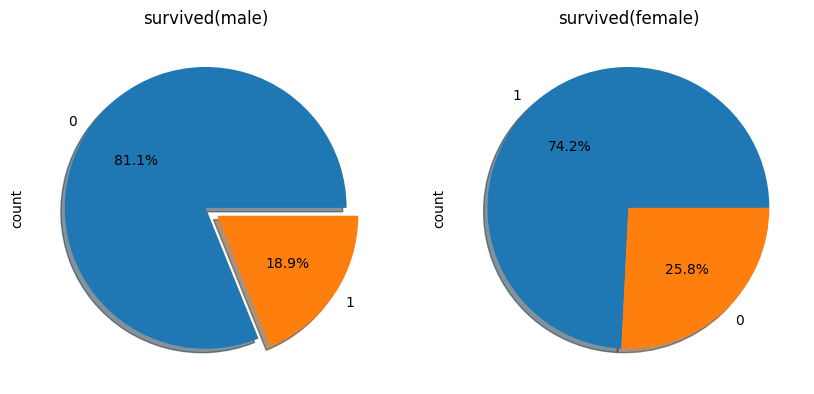

In [9]:
# 성별 별 생존자 비율 확인

f,ax = plt.subplots(1,2,figsize=(10,5))

# f : figure 객체 저장
# ax : subplot 2개 담은 배열

titanic['survived'][titanic['sex']=='male'].value_counts().plot.pie(explode =[0, 0.1],autopct='%.1f%%',ax=ax[0],shadow=True)
titanic['survived'][titanic['sex']=='female'].value_counts().plot.pie(autopct='%.1f%%',ax=ax[1],shadow=True)

# 1. 해당 성별을 필터링
# 2. count
# 3. pie


ax[0].set_title('survived(male)')
ax[1].set_title('survived(female)')

plt.show()

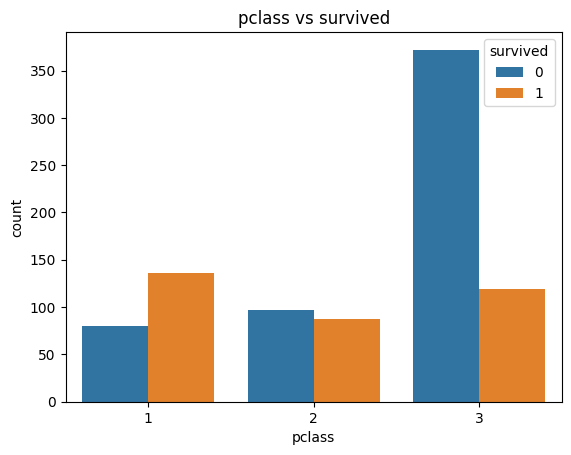

In [10]:
#seaborn을 이용해 객실등급 별 생존여부를 countplot 으로 확인

sns.countplot(x='pclass',hue='survived',data=titanic)
plt.title('pclass vs survived')
plt.show()

In [ ]:
# 변수간의 상관관계 (-1 ~ 1)
# corr : 상관관계를 표현해주는 함수

print(titanic['survived'].corr(titanic['adult_male'])) # 음의 상관관계
print(titanic['survived'].corr(titanic['fare'])) # 약한 양의 상관관계

-0.5570800422053257
0.2573065223849625


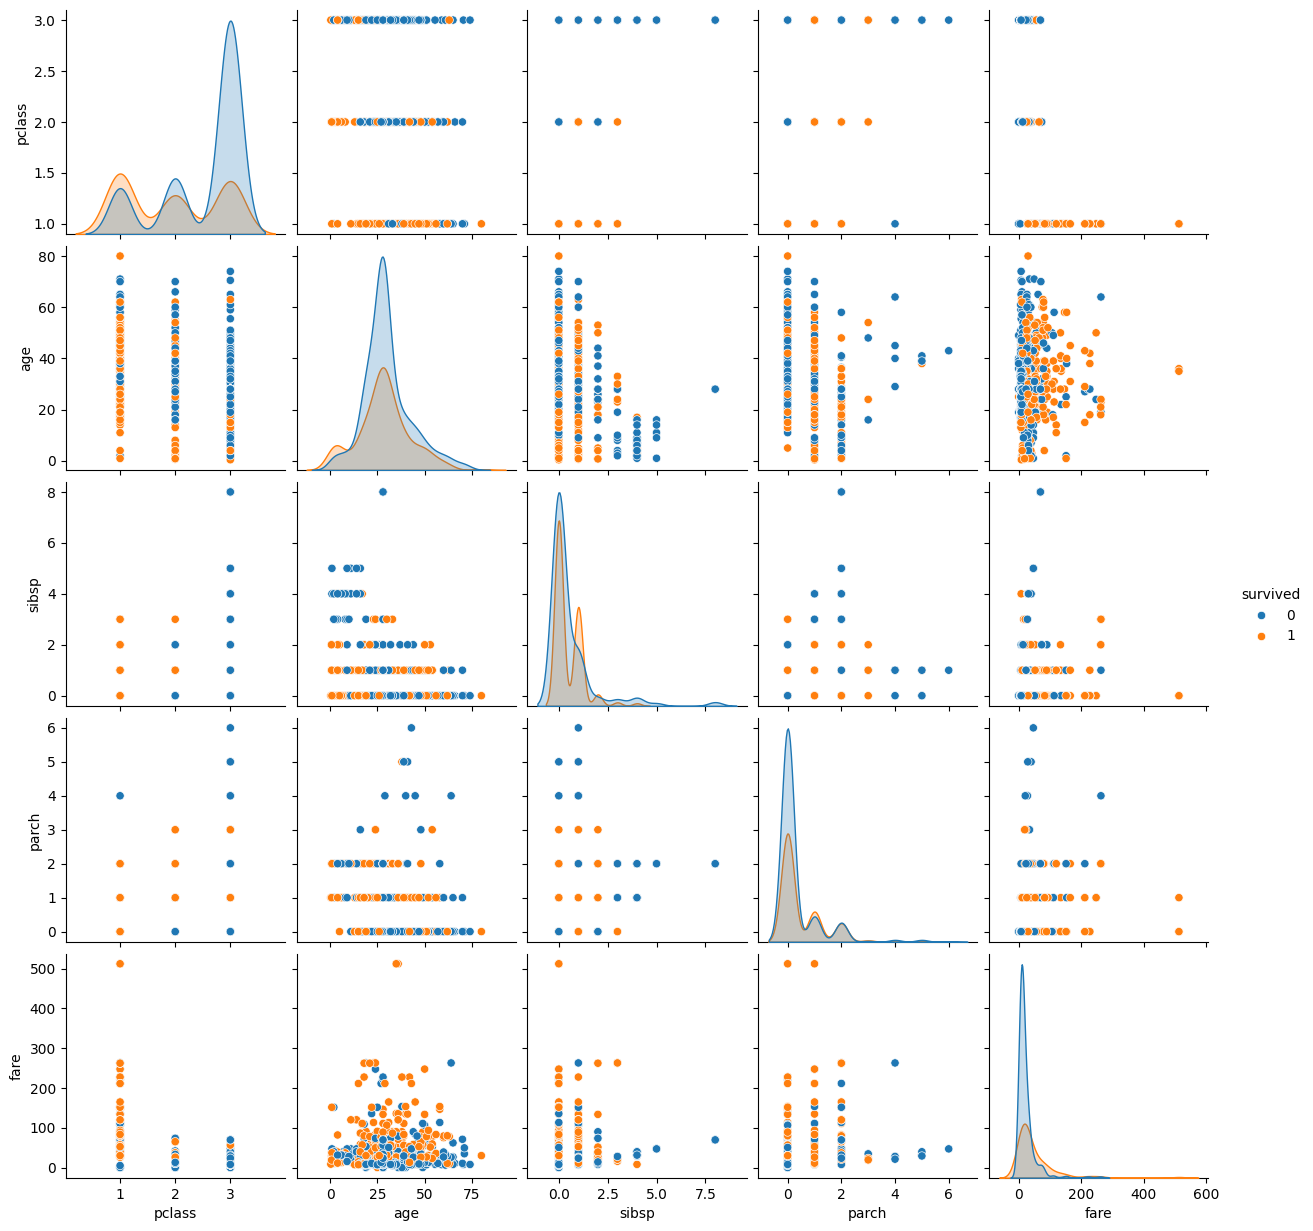

In [ ]:
num_cols=titanic.select_dtypes(include=['float64','int64'])

# pairplot (여러개의 산점도를 작성)
sns.pairplot(num_cols, hue='survived')

plt.show()

In [21]:
# heatmap (열지도) : 숫자데이터를 색상으로 표현
# 한눈에 패턴, 상관관계, 크기를 파악할 수 있게 해주는 시각화 기법

# 나이는 여러개의 색상으로 나타내기에는 보기 번거로워 새로운 컬럼을 사용하여 정리
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

titanic['age2']=titanic['age'].apply(category_age)


In [23]:
# heatmap은 숫자데이터를 다루기 때문에
titanic['sex']=titanic['sex'].map({'male':1,'female':0})
titanic['family']= titanic['sibsp']+titanic['parch']+1

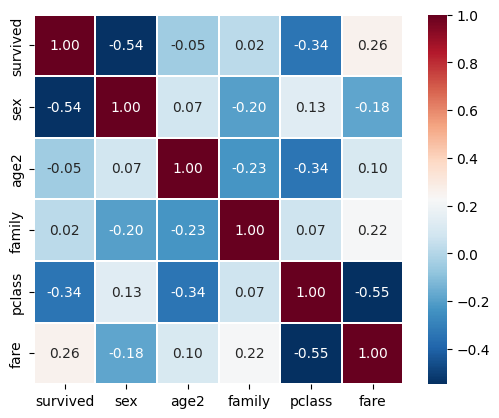

In [25]:
# heatmap에 사용할 데이터 정리
heatmap_data=titanic[['survived','sex','age2','family','pclass','fare']]

# 색상설정
colormap=plt.cm.RdBu_r

sns.heatmap(heatmap_data.astype(float).corr(),linewidths=0.1,vmax=1.0,
            square=True,cmap=colormap,linecolor='white',annot=True,fmt='.2f',
            annot_kws={'size':10})

# 상관계수 계산
# linewidths : 셀 경계선 두께
# vmax : 컬러 스케일 최대값
# square : 정사각형
# cmap : 색상 맵
# linecolor : 경계선 색
# annot : 셀안에 값 표시
# fmt : 상관계수 자리수 포맷 형식
# annot_kws : 글자크기

plt.show()